In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir('C:/Users/manit/OneDrive/Desktop/Masters/Spring20/Sabir/data')
df = pd.read_csv("sgemm_product.csv")
pd.DataFrame.rename(df,columns={'Run1 (ms)':'Run1','Run2 (ms)':'Run2','Run3 (ms)':'Run3', 'Run4 (ms)':'Run4'},inplace =True)
df['AverageRun']=df.apply(lambda row:(row.Run1+row.Run2+row.Run3+row.Run4)/4,axis=1)
df = df.drop(["Run1","Run2","Run3","Run4"], axis=1)

In [3]:
mean_run=np.mean(df["AverageRun"],axis=0)
print(mean_run)
df["run_class"]=np.where(df['AverageRun']>=mean_run, 1, 0)
y=df["run_class"].astype("category")
x=df.iloc[:,0:14]

217.571953093958


In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)
std_Xtrain = preprocessing.scale(x_train)
std_Xtest = preprocessing.scale(x_test)
std_Xtest.shape
y_test.shape

(72480,)

In [12]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score, roc_auc_score

In [46]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense, Activation
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [26]:
model = Sequential()
model.add(Dense(50, input_dim=14, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain, y_train, epochs=10)
test_loss3, test_acc3 = model.evaluate(std_Xtest,  y_test, verbose=2)
train_loss3,train_acc3 = model.evaluate(std_Xtrain,  y_train, verbose=2)

print('\nTest accuracy:', test_acc3)
print('\nTrain accuracy:', train_acc3)

Epoch 1/10
169120/169120 [==============================] - 4s 24us/step - loss: 0.1225 - accuracy: 0.9497
Epoch 2/10
169120/169120 [==============================] - 4s 23us/step - loss: 0.0718 - accuracy: 0.9691
Epoch 3/10
169120/169120 [==============================] - 4s 24us/step - loss: 0.0564 - accuracy: 0.9761
Epoch 4/10
169120/169120 [==============================] - 4s 25us/step - loss: 0.0483 - accuracy: 0.9795
Epoch 5/10
169120/169120 [==============================] - 4s 25us/step - loss: 0.0433 - accuracy: 0.9820
Epoch 6/10
169120/169120 [==============================] - 4s 24us/step - loss: 0.0399 - accuracy: 0.9834
Epoch 7/10
169120/169120 [==============================] - 4s 26us/step - loss: 0.0380 - accuracy: 0.9843
Epoch 8/10
169120/169120 [==============================] - 5s 27us/step - loss: 0.0360 - accuracy: 0.9854
Epoch 9/10
169120/169120 [==============================] - 4s 26us/step - loss: 0.0346 - accuracy: 0.9855
Epoch 10/10
169120/169120 [==========

In [27]:
def createmodel(neurons=10):
  
  model = Sequential()
  model.add(Dense(20, input_dim=14, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model
model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
neurons = [10, 20, 30,40,50]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

for mean,param in zip(means,params):
    print("%f with: %r" % (mean, param))


Epoch 1/10
 - 4s - loss: 0.1664 - accuracy: 0.9294
Epoch 2/10
 - 5s - loss: 0.0991 - accuracy: 0.9579
Epoch 3/10
 - 4s - loss: 0.0818 - accuracy: 0.9640
Epoch 4/10
 - 4s - loss: 0.0753 - accuracy: 0.9656
Epoch 5/10
 - 4s - loss: 0.0704 - accuracy: 0.9680
Epoch 6/10
 - 4s - loss: 0.0668 - accuracy: 0.9706
Epoch 7/10
 - 4s - loss: 0.0639 - accuracy: 0.9724
Epoch 8/10
 - 5s - loss: 0.0611 - accuracy: 0.9733
Epoch 9/10
 - 5s - loss: 0.0595 - accuracy: 0.9744
Epoch 10/10
 - 4s - loss: 0.0580 - accuracy: 0.9752
Best: 0.973610 using {'neurons': 20}
0.972919 with: {'neurons': 10}
0.973610 with: {'neurons': 20}
0.972250 with: {'neurons': 30}
0.972724 with: {'neurons': 40}
0.970873 with: {'neurons': 50}


In [28]:
train_errors=[]
test_errors=[]
model = Sequential()
model.add(Dense(50, input_dim=14, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain, y_train, epochs=10,batch_size=20)
test_loss, test_acc = model.evaluate(std_Xtest,  y_test, verbose=2)
train_loss, train_acc = model.evaluate(std_Xtrain,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTrain accuracy:', train_acc)

Epoch 1/10
169120/169120 [==============================] - 7s 44us/step - loss: 0.1014 - accuracy: 0.9575
Epoch 2/10
169120/169120 [==============================] - 9s 56us/step - loss: 0.0586 - accuracy: 0.9746
Epoch 3/10
169120/169120 [==============================] - 9s 53us/step - loss: 0.0483 - accuracy: 0.9794
Epoch 4/10
169120/169120 [==============================] - 10s 59us/step - loss: 0.0416 - accuracy: 0.9821
Epoch 5/10
169120/169120 [==============================] - 11s 63us/step - loss: 0.0374 - accuracy: 0.9839
Epoch 6/10
169120/169120 [==============================] - 10s 57us/step - loss: 0.0341 - accuracy: 0.9858
Epoch 7/10
169120/169120 [==============================] - 9s 53us/step - loss: 0.0322 - accuracy: 0.9861
Epoch 8/10
169120/169120 [==============================] - 9s 55us/step - loss: 0.0299 - accuracy: 0.9876
Epoch 9/10
169120/169120 [==============================] - 9s 52us/step - loss: 0.0283 - accuracy: 0.9884
Epoch 10/10
169120/169120 [=======

In [29]:
model = Sequential()
model.add(Dense(50, input_dim=14, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain, y_train, epochs=10,batch_size=20)
test_loss1, test_acc1 = model.evaluate(std_Xtest,  y_test, verbose=2)
train_loss1,train_acc1 = model.evaluate(std_Xtrain,  y_train, verbose=2)

print('\nTest accuracy:', test_acc1)
print('\nTrain accuracy:', train_acc1)

Epoch 1/10
169120/169120 [==============================] - 8s 47us/step - loss: 0.1026 - accuracy: 0.9565
Epoch 2/10
169120/169120 [==============================] - 8s 46us/step - loss: 0.0615 - accuracy: 0.9733
Epoch 3/10
169120/169120 [==============================] - 8s 46us/step - loss: 0.0493 - accuracy: 0.9785
Epoch 4/10
169120/169120 [==============================] - 7s 44us/step - loss: 0.0434 - accuracy: 0.9815
Epoch 5/10
169120/169120 [==============================] - 7s 44us/step - loss: 0.0387 - accuracy: 0.9835
Epoch 6/10
169120/169120 [==============================] - 8s 46us/step - loss: 0.0357 - accuracy: 0.9850
Epoch 7/10
169120/169120 [==============================] - 9s 54us/step - loss: 0.0331 - accuracy: 0.9864
Epoch 8/10
169120/169120 [==============================] - 8s 49us/step - loss: 0.0307 - accuracy: 0.9875
Epoch 9/10
169120/169120 [==============================] - 8s 45us/step - loss: 0.0291 - accuracy: 0.9881
Epoch 10/10
169120/169120 [==========

In [30]:
model = Sequential()
model.add(Dense(50, input_dim=14, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain, y_train, epochs=10,batch_size=20)
test_loss2, test_acc2 = model.evaluate(std_Xtest,  y_test, verbose=2)
train_loss2,train_acc2 = model.evaluate(std_Xtrain,  y_train, verbose=2)

print('\nTest accuracy:', test_acc2)
print('\nTrain accuracy:', train_acc2)

Epoch 1/10
169120/169120 [==============================] - 7s 42us/step - loss: 0.1137 - accuracy: 0.9531
Epoch 2/10
169120/169120 [==============================] - 7s 43us/step - loss: 0.0682 - accuracy: 0.9710
Epoch 3/10
169120/169120 [==============================] - 8s 49us/step - loss: 0.0554 - accuracy: 0.9766 0s - loss:
Epoch 4/10
169120/169120 [==============================] - 8s 49us/step - loss: 0.0482 - accuracy: 0.9797
Epoch 5/10
169120/169120 [==============================] - 7s 43us/step - loss: 0.0435 - accuracy: 0.9815
Epoch 6/10
169120/169120 [==============================] - 7s 41us/step - loss: 0.0405 - accuracy: 0.9827
Epoch 7/10
169120/169120 [==============================] - 8s 45us/step - loss: 0.0374 - accuracy: 0.9844
Epoch 8/10
169120/169120 [==============================] - 7s 44us/step - loss: 0.0358 - accuracy: 0.9848
Epoch 9/10
169120/169120 [==============================] - 8s 46us/step - loss: 0.0336 - accuracy: 0.9859
Epoch 10/10
169120/169120 

In [31]:
model = Sequential()
model.add(Dense(70, input_dim=14, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain, y_train, epochs=10,batch_size=20)
test_loss3, test_acc3 = model.evaluate(std_Xtest,  y_test, verbose=2)
train_loss3,train_acc3 = model.evaluate(std_Xtrain,  y_train, verbose=2)

print('\nTest accuracy:', test_acc3)
print('\nTrain accuracy:', train_acc3)

Epoch 1/10
169120/169120 [==============================] - 9s 51us/step - loss: 0.0997 - accuracy: 0.9578
Epoch 2/10
169120/169120 [==============================] - 9s 55us/step - loss: 0.0576 - accuracy: 0.9750
Epoch 3/10
169120/169120 [==============================] - 10s 59us/step - loss: 0.0462 - accuracy: 0.9801
Epoch 4/10
169120/169120 [==============================] - 9s 55us/step - loss: 0.0394 - accuracy: 0.9833
Epoch 5/10
169120/169120 [==============================] - 9s 51us/step - loss: 0.0335 - accuracy: 0.9861
Epoch 6/10
169120/169120 [==============================] - 9s 51us/step - loss: 0.0305 - accuracy: 0.9877
Epoch 7/10
169120/169120 [==============================] - 9s 51us/step - loss: 0.0277 - accuracy: 0.9887
Epoch 8/10
169120/169120 [==============================] - 9s 52us/step - loss: 0.0258 - accuracy: 0.9895
Epoch 9/10
169120/169120 [==============================] - 9s 52us/step - loss: 0.0240 - accuracy: 0.9907
Epoch 10/10
169120/169120 [=========

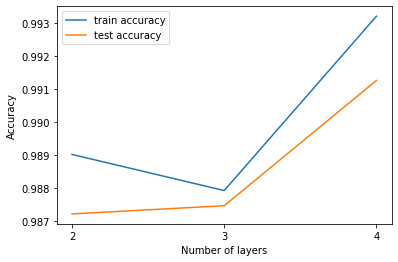

[0.9872240424156189, 0.987472414970398, 0.9912665486335754]

In [32]:
train_errors=[train_acc2,train_acc1,train_acc3]
test_errors=[test_acc2,test_acc1,test_acc3]
x=[2,3,4]
plt.figure()
plt.plot(x,train_errors,label='train accuracy')
plt.plot(x,test_errors,label='test accuracy')
plt.xlabel("Number of layers")
plt.xticks([2,3,4])
plt.ylabel("Accuracy")
plt.legend()
plt.show()

train_errors
test_errors

Epoch 1/10
 - 5s - loss: 0.1122 - accuracy: 0.9530
Epoch 2/10
 - 5s - loss: 0.0621 - accuracy: 0.9732
Epoch 3/10
 - 5s - loss: 0.0484 - accuracy: 0.9796
Epoch 4/10
 - 5s - loss: 0.0410 - accuracy: 0.9828
Epoch 5/10
 - 5s - loss: 0.0363 - accuracy: 0.9847
Epoch 6/10
 - 4s - loss: 0.0331 - accuracy: 0.9864
Epoch 7/10
 - 5s - loss: 0.0302 - accuracy: 0.9875
Epoch 8/10
 - 5s - loss: 0.0277 - accuracy: 0.9889
Epoch 9/10
 - 5s - loss: 0.0264 - accuracy: 0.9894
Epoch 10/10
 - 5s - loss: 0.0242 - accuracy: 0.9903
Best: 0.985555 using {'neurons': 50}
0.980830 with: {'neurons': 20}
0.983473 with: {'neurons': 30}
0.985324 with: {'neurons': 40}
0.985555 with: {'neurons': 50}


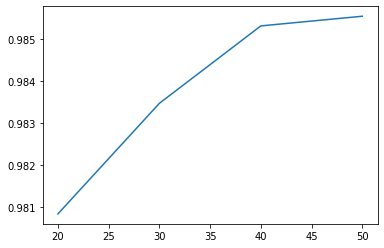

In [34]:
def createmodel(neurons=20):
  
  
  model = Sequential()
  model.add(Dense(neurons, input_dim=14, activation='relu'))
  model.add(Dense(50, input_dim=14, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
neurons = [20,30,40,50]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

for mean,param in zip(means,params):
    print("%f with: %r" % (mean, param))
plt.figure()
plt.plot([20,30,40,50],means)
plt.show()

Epoch 1/10
 - 6s - loss: 0.1167 - accuracy: 0.9518
Epoch 2/10
 - 7s - loss: 0.0672 - accuracy: 0.9713
Epoch 3/10
 - 7s - loss: 0.0542 - accuracy: 0.9768
Epoch 4/10
 - 6s - loss: 0.0478 - accuracy: 0.9794
Epoch 5/10
 - 7s - loss: 0.0435 - accuracy: 0.9809
Epoch 6/10
 - 7s - loss: 0.0405 - accuracy: 0.9826
Epoch 7/10
 - 6s - loss: 0.0381 - accuracy: 0.9836
Epoch 8/10
 - 6s - loss: 0.0360 - accuracy: 0.9845
Epoch 9/10
 - 6s - loss: 0.0344 - accuracy: 0.9856
Epoch 10/10
 - 6s - loss: 0.0331 - accuracy: 0.9860
Best: 0.984295 using {'neurons': 20}
0.979305 with: {'neurons': 5}
0.981889 with: {'neurons': 10}
0.984295 with: {'neurons': 20}


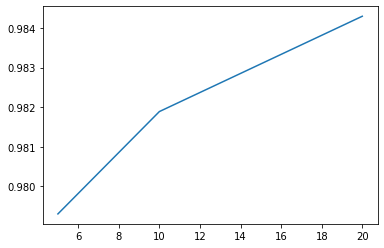

In [36]:
def createmodel(neurons=5):
  
  
  model = Sequential()
  model.add(Dense(50, input_dim=14, activation='relu'))
  model.add(Dense(neurons, input_dim=14, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
neurons = [5,10,20]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

for mean,param in zip(means,params):
    print("%f with: %r" % (mean, param))
plt.figure()
plt.plot([5,10,20],means)
plt.show()

Epoch 1/10
 - 5s - loss: 0.1231 - accuracy: 0.9487
Epoch 2/10
 - 5s - loss: 0.0709 - accuracy: 0.9700
Epoch 3/10
 - 5s - loss: 0.0564 - accuracy: 0.9761
Epoch 4/10
 - 5s - loss: 0.0488 - accuracy: 0.9798
Epoch 5/10
 - 5s - loss: 0.0435 - accuracy: 0.9814
Epoch 6/10
 - 5s - loss: 0.0405 - accuracy: 0.9830
Epoch 7/10
 - 5s - loss: 0.0373 - accuracy: 0.9843
Epoch 8/10
 - 6s - loss: 0.0350 - accuracy: 0.9852
Epoch 9/10
 - 5s - loss: 0.0335 - accuracy: 0.9862
Epoch 10/10
 - 6s - loss: 0.0318 - accuracy: 0.9868
Best: 0.982504 using {'neurons': 10}
0.982504 with: {'neurons': 10}
0.982344 with: {'neurons': 15}
0.982202 with: {'neurons': 20}


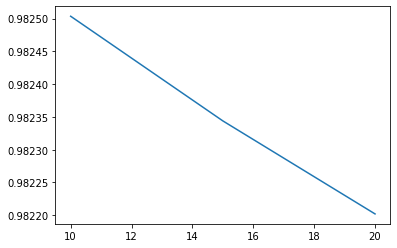

In [37]:
def createmodel(neurons=10):
  
  
  model = Sequential()
  model.add(Dense(50, input_dim=14, activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(neurons, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
neurons = [10,15,20]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

for mean,param in zip(means,params):
    print("%f with: %r" % (mean, param))
plt.figure()
plt.plot([10,15,20],means)
plt.show()

Epoch 1/10
 - 7s - loss: 0.2314 - accuracy: 0.9464
Epoch 2/10
 - 7s - loss: 0.0974 - accuracy: 0.9682
Epoch 3/10
 - 7s - loss: 0.0836 - accuracy: 0.9734
Epoch 4/10
 - 8s - loss: 0.0778 - accuracy: 0.9759
Epoch 5/10
 - 7s - loss: 0.0735 - accuracy: 0.9779
Epoch 6/10
 - 8s - loss: 0.0716 - accuracy: 0.9786
Epoch 7/10
 - 7s - loss: 0.0698 - accuracy: 0.9794
Epoch 8/10
 - 7s - loss: 0.0680 - accuracy: 0.9805
Epoch 9/10
 - 7s - loss: 0.0663 - accuracy: 0.9812
Epoch 10/10
 - 7s - loss: 0.0657 - accuracy: 0.9813
Best: 0.982013 using {'activation': 'relu'}
0.982013 with: {'activation': 'relu'}
0.979671 with: {'activation': 'tanh'}
0.967644 with: {'activation': 'sigmoid'}


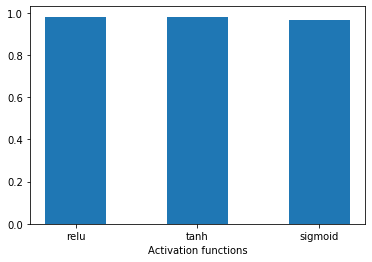

In [39]:
def createmodel(activation="relu"):
  
  
  model = Sequential()
  model.add(Dense(50, input_dim=14, activation=activation))
  model.add(Dense(20, activation=activation))
  model.add(Dense(10, activation=activation))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
activation = ['relu', 'tanh', 'sigmoid']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

for mean,param in zip(means,params):
    print("%f with: %r" % (mean, param))
plt.figure()
plt.bar(activation,means,width=0.5)
plt.xlabel("Activation functions")
plt.show()


Epoch 1/10
 - 6s - loss: 0.2134 - accuracy: 0.9213
Epoch 2/10
 - 7s - loss: 0.1477 - accuracy: 0.9440
Epoch 3/10
 - 6s - loss: 0.1262 - accuracy: 0.9515
Epoch 4/10
 - 6s - loss: 0.1148 - accuracy: 0.9568
Epoch 5/10
 - 5s - loss: 0.1051 - accuracy: 0.9621
Epoch 6/10
 - 5s - loss: 0.0950 - accuracy: 0.9656
Epoch 7/10
 - 5s - loss: 0.0782 - accuracy: 0.9683
Epoch 8/10
 - 6s - loss: 0.0666 - accuracy: 0.9716
Epoch 9/10
 - 6s - loss: 0.0599 - accuracy: 0.9747
Epoch 10/10
 - 7s - loss: 0.0555 - accuracy: 0.9759
Best: 0.967857 using {'activation': 'sigmoid'}
0.817491 with: {'activation': 'relu'}
0.565273 with: {'activation': 'tanh'}
0.967857 with: {'activation': 'sigmoid'}


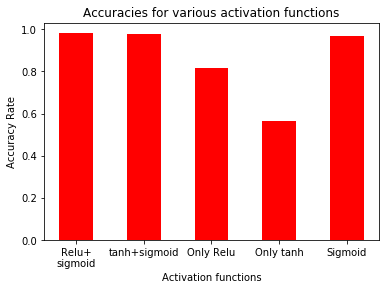

In [41]:
def createmodel(activation="relu"):
  
  
  model = Sequential()
  model.add(Dense(50, input_dim=14, activation=activation))
  model.add(Dense(20, activation=activation))
  model.add(Dense(10, activation=activation))
  model.add(Dense(1, activation=activation))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
activation = ['relu', 'tanh', 'sigmoid']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means1 = grid_result.cv_results_['mean_test_score']
params1 = grid_result.cv_results_['params']

for mean,param in zip(means1,params1):
    print("%f with: %r" % (mean, param))

accuracies=[means[0],means[1],means1[0],means1[1],means1[2]]
plt.figure()
xaxis=["Relu+\nsigmoid","tanh+sigmoid","Only Relu","Only tanh","Sigmoid"]
plt.bar(xaxis,accuracies,color="red",width=0.5)
plt.xlabel("Activation functions")
plt.ylabel("Accuracy Rate")
plt.title("Accuracies for various activation functions",)
plt.show()


Epoch 1/10
 - 5s - loss: 0.1189 - accuracy: 0.9478
Epoch 2/10
 - 5s - loss: 0.0656 - accuracy: 0.9715
Epoch 3/10
 - 6s - loss: 0.0530 - accuracy: 0.9768
Epoch 4/10
 - 6s - loss: 0.0471 - accuracy: 0.9792
Epoch 5/10
 - 5s - loss: 0.0437 - accuracy: 0.9810
Epoch 6/10
 - 6s - loss: 0.0408 - accuracy: 0.9824
Epoch 7/10
 - 7s - loss: 0.0393 - accuracy: 0.9833
Epoch 8/10
 - 6s - loss: 0.0376 - accuracy: 0.9838
Epoch 9/10
 - 6s - loss: 0.0353 - accuracy: 0.9851
Epoch 10/10
 - 6s - loss: 0.0339 - accuracy: 0.9851
Best: 0.982184 using {'optimizer': 'Adam'}
0.964623 with: {'optimizer': 'SGD'}
0.978187 with: {'optimizer': 'RMSprop'}
0.967473 with: {'optimizer': 'Adagrad'}
0.978536 with: {'optimizer': 'Adadelta'}
0.982184 with: {'optimizer': 'Adam'}
0.980067 with: {'optimizer': 'Adamax'}


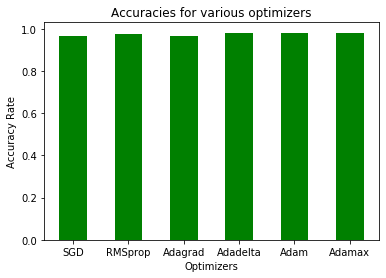

In [42]:
def createmodel(optimizer="adam"):
  
  
  model = Sequential()
  model.add(Dense(50, input_dim=14, activation="relu"))
  model.add(Dense(20, activation="relu"))
  model.add(Dense(10, activation="relu"))
  model.add(Dense(1, activation="sigmoid"))

  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means1 = grid_result.cv_results_['mean_test_score']
params1 = grid_result.cv_results_['params']
for mean,param in zip(means1,params1):
    print("%f with: %r" % (mean, param))
    
plt.bar(optimizer,means1,color="green",width=0.5)
plt.xlabel("Optimizers")
plt.ylabel("Accuracy Rate")
plt.title("Accuracies for various optimizers",)
plt.show()

In [47]:
model = Sequential()
model.add(Dense(50, input_dim=14, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.0))

model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain, y_train, epochs=10)
test_loss3, test_acc3 = model.evaluate(std_Xtest,  y_test, verbose=2)
train_loss3,train_acc3 = model.evaluate(std_Xtrain,  y_train, verbose=2)

print('\nTest accuracy:', test_acc3)
print('\nTrain accuracy:', train_acc3)

Epoch 1/10
169120/169120 [==============================] - 13s 77us/step - loss: 0.1846 - accuracy: 0.9305
Epoch 2/10
169120/169120 [==============================] - 13s 75us/step - loss: 0.1002 - accuracy: 0.9620
Epoch 3/10
169120/169120 [==============================] - 13s 76us/step - loss: 0.0863 - accuracy: 0.9666
Epoch 4/10
169120/169120 [==============================] - 13s 77us/step - loss: 0.0768 - accuracy: 0.9703
Epoch 5/10
169120/169120 [==============================] - 13s 77us/step - loss: 0.0707 - accuracy: 0.9724
Epoch 6/10
169120/169120 [==============================] - 13s 79us/step - loss: 0.0664 - accuracy: 0.9741
Epoch 7/10
169120/169120 [==============================] - 14s 82us/step - loss: 0.0636 - accuracy: 0.9756
Epoch 8/10
169120/169120 [==============================] - 14s 84us/step - loss: 0.0600 - accuracy: 0.9773
Epoch 9/10
169120/169120 [==============================] - 14s 82us/step - loss: 0.0586 - accuracy: 0.9779
Epoch 10/10
169120/169120 [=

Epoch 1/10
 - 12s - loss: 0.1225 - accuracy: 0.9477
Epoch 2/10
 - 10s - loss: 0.0747 - accuracy: 0.9676
Epoch 3/10
 - 11s - loss: 0.0629 - accuracy: 0.9726
Epoch 4/10
 - 11s - loss: 0.0538 - accuracy: 0.9766
Epoch 5/10
 - 11s - loss: 0.0473 - accuracy: 0.9794
Epoch 6/10
 - 11s - loss: 0.0433 - accuracy: 0.9814
Epoch 7/10
 - 11s - loss: 0.0406 - accuracy: 0.9826
Epoch 8/10
 - 8s - loss: 0.0385 - accuracy: 0.9837
Epoch 9/10
 - 9s - loss: 0.0369 - accuracy: 0.9845
Epoch 10/10
 - 11s - loss: 0.0353 - accuracy: 0.9854
Best: 0.982634 using {'dropout_rate': 0.0}
0.982634 with: {'dropout_rate': 0.0}
0.981380 with: {'dropout_rate': 0.1}
0.976248 with: {'dropout_rate': 0.2}
0.979955 with: {'dropout_rate': 0.3}
0.979760 with: {'dropout_rate': 0.4}
0.977105 with: {'dropout_rate': 0.5}
0.975242 with: {'dropout_rate': 0.6}
0.974403 with: {'dropout_rate': 0.7}
0.813281 with: {'dropout_rate': 0.8}
0.860271 with: {'dropout_rate': 0.9}


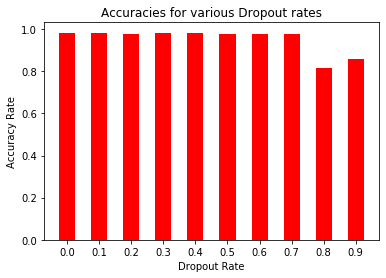

In [49]:
from keras.layers import Dropout

def createmodel(dropout_rate=0.0):
  
  
  model = Sequential()
  model.add(Dense(50, input_dim=14, activation="relu"))
  model.add(Dense(20, activation="relu"))
  model.add(Dense(10, activation="relu"))
  model.add(Dropout(dropout_rate))

  model.add(Dense(1, activation="sigmoid"))

  model.compile(optimizer="Adam",
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means1 = grid_result.cv_results_['mean_test_score']
params1 = grid_result.cv_results_['params']
for mean,param in zip(means1,params1):
    print("%f with: %r" % (mean, param))
    
plt.figure()
plt.bar(dropout_rate,means1,color="red",width=0.05)
plt.xticks(dropout_rate)
plt.xlabel("Dropout Rate")
plt.ylabel("Accuracy Rate")
plt.title("Accuracies for various Dropout rates")
plt.show()

In [15]:
#KNN

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
os.chdir('C:/Users/manit/OneDrive/Desktop/Masters/Spring20/Sabir/data')
df = pd.read_csv("sgemm_product.csv")
pd.DataFrame.rename(df,columns={'Run1 (ms)':'Run1','Run2 (ms)':'Run2','Run3 (ms)':'Run3', 'Run4 (ms)':'Run4'},inplace =True)
df['AverageRun']=df.apply(lambda row:(row.Run1+row.Run2+row.Run3+row.Run4)/4,axis=1)
df = df.drop(["Run1","Run2","Run3","Run4"], axis=1)

mean_run=np.mean(df["AverageRun"],axis=0)
print(mean_run)
df["run_class"]=np.where(df['AverageRun']>=mean_run, 1, 0)
y=df["run_class"].astype("category")
x=df.iloc[:,0:14]

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)
scaler = StandardScaler()

scaler.fit(x_train)

std_Xtrain = scaler.transform(x_train)
std_Xtest = scaler.transform(x_test)
std_Xtrain.shape
std_Xtest.shape
y_test.shape

217.571953093958


(72480,)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(std_Xtrain, y_train)
y_pred = classifier.predict(std_Xtrain)

In [18]:
train_error = []
test_error=[]
train_accuracies=[]
test_accuracies=[]

# Calculating error for K values between 1 and 40
for i in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=i,metric="euclidean")
    knn.fit(std_Xtrain, y_train)
    train_pred=knn.predict(std_Xtrain)

    test_pred = knn.predict(std_Xtest)
    
    train_accuracies.append(accuracy_score(y_train,train_pred))
    test_accuracies.append(accuracy_score(y_test,test_pred))
    train_error.append(np.mean(y_train!=train_pred))
    test_error.append(np.mean(y_test!=test_pred))

In [19]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.plot(range(2, 15),train_error, marker='o' ,color='red' )
plt.plot(range(2, 15),test_error, marker='o' ,color='blue' )

plt.title('KNN - Euclidean')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Mean Error')

In [ ]:
train_error = []
test_error=[]
train_accuracies=[]
test_accuracies=[]

# Calculating error for K values between 1 and 40
for i in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=i,metric="euclidean")
    knn.fit(std_Xtrain, y_train)
    train_pred=knn.predict(std_Xtrain)

    test_pred = knn.predict(std_Xtest)
    
    train_accuracies.append(accuracy_score(y_train,train_pred))
    test_accuracies.append(accuracy_score(y_test,test_pred))
    train_error.append(np.mean(y_train!=train_pred))
    test_error.append(np.mean(y_test!=test_pred))

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.plot(range(2, 15),train_error, marker='o' ,color='red' )
plt.plot(range(2, 15),test_error, marker='o' ,color='blue' )

plt.title('KNN - Euclidean')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [20]:
#Manhattan
train_error = []
test_error=[]
train_accuracies=[]
test_accuracies=[]
# Calculating error for K values between 1 and 40
for i in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=i,metric="manhattan")
    knn.fit(std_Xtrain, y_train)
    train_pred=knn.predict(std_Xtrain)

    test_pred = knn.predict(std_Xtest)
    
    train_accuracies.append(accuracy_score(y_train,train_pred))
    test_accuracies.append(accuracy_score(y_test,test_pred))
    train_error.append(np.mean(y_train!=train_pred))
    test_error.append(np.mean(y_test!=test_pred))

Text(0, 0.5, 'Mean Error')

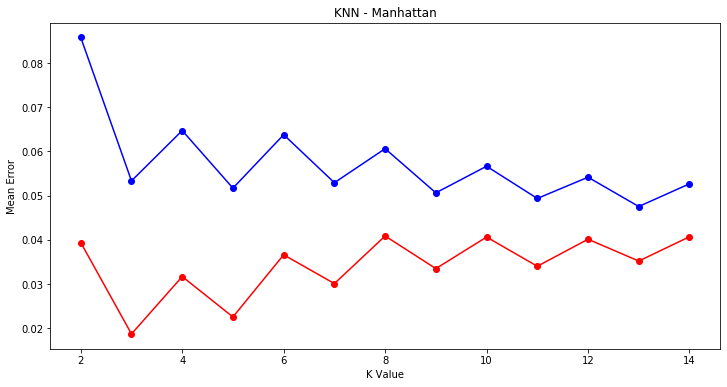

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 15),train_error, marker='o' ,color='red' )
plt.plot(range(2, 15),test_error, marker='o' ,color='blue' )

plt.title('KNN - Manhattan')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [22]:
knn = KNeighborsClassifier(n_neighbors=8,metric="manhattan")
knn.fit(std_Xtrain, y_train)
train_pred=knn.predict(std_Xtrain)

test_pred = knn.predict(std_Xtest)
print(classification_report(y_test,test_pred))
print(confusion_matrix(y_test,test_pred))
print(accuracy_score(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     53708
           1       0.96      0.80      0.87     18772

    accuracy                           0.94     72480
   macro avg       0.95      0.89      0.92     72480
weighted avg       0.94      0.94      0.94     72480

[[53085   623]
 [ 3771 15001]]
0.9393763796909492
